# Exploratory data analysis of Amazon Top 50 Books

### Objective 
1. Check if there is any errors in the data (null value / typo / whitespace / unreasonable value)
2. Visualize the correlation matrix using heatmap
3. Create a countplot 


#### The data on air pollution in Seoul were analyzed and were visualized in a map using geopandas. The dataset was provided by Kaggle.


In [105]:
#data preprocessing, analysis
import pandas as pd
import numpy as np

#visualization for graph
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
amazon = pd.read_csv('/Users/minjeongkim/Desktop/datasets/bestsellers with categories.csv')

In [107]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [108]:
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [109]:
# Check if there is any empty/null value in the dataframe 
print(amazon.isnull().sum().sum()) 

0


In [110]:
amazon['Genre'].value_counts(normalize=True) #Categorical 

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [111]:
amazon['User Rating'].value_counts(normalize=True)

4.8    0.230909
4.7    0.196364
4.6    0.190909
4.5    0.109091
4.9    0.094545
4.4    0.069091
4.3    0.045455
4.0    0.025455
4.2    0.014545
4.1    0.010909
3.9    0.005455
3.8    0.003636
3.3    0.001818
3.6    0.001818
Name: User Rating, dtype: float64

In [112]:
sorted(amazon['Author'].unique().tolist())
# George R. R. Martin and J. K. Rowling are not counted as unique due to whitespace
amazon.loc[amazon.Author == 'George R.R. Martin', 'Author'] = "George R. R. Martin"
amazon.loc[amazon.Author == 'J.K. Rowling', 'Author'] = "J. K. Rowling"

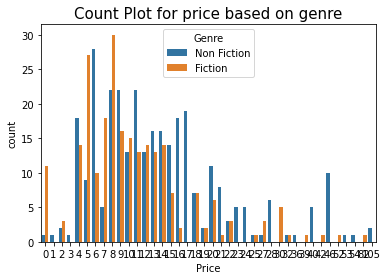

['Cabin Fever (Diary of a Wimpy Kid, Book 6)', 'Diary of a Wimpy Kid: Hard Luck, Book 8', 'Frozen (Little Golden Book)', 'JOURNEY TO THE ICE P', 'Little Blue Truck', 'The Constitution of the United States', 'The Getaway', 'The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)', 'To Kill a Mockingbird']


In [122]:
sns.countplot(x = amazon['Price'],hue=amazon['Genre'])
plt.title('Count Plot for price based on genre', fontsize = 15)
plt.show()

# Error in the data as the book is worth $0

free_list = amazon.loc[amazon.Price == 0]
free_name = free_list['Name'].unique().tolist()

print(free_name)

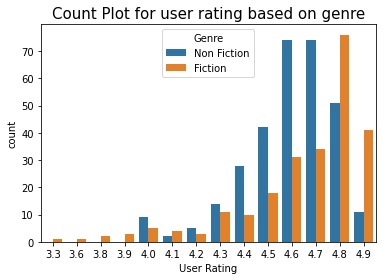

In [114]:
sns.countplot(x = amazon['User Rating'],hue=amazon['Genre'])
plt.title('Count Plot for user rating based on genre', fontsize = 15)
plt.show()

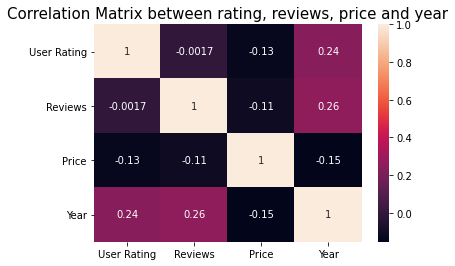

In [115]:
# Check the correlation between rating, reviews, price and year 
corrmat = amazon.corr()
sns.heatmap(corrmat, annot=True)
plt.title('Correlation Matrix between rating, reviews, price and year', fontsize = 15)
plt.show()

In [130]:
price_f = amazon[amazon['Genre'] == 'Fiction']
price_nf = amazon[amazon['Genre'] == 'Non Fiction']

#plt.scatter(price_f['Price'], price_f['Genre'])
#plt.plot(price_f['Price'], price_f['Genre'])